# Jason Chalom Dec 2017 - Retro Rabbit Data Scientist Test
## Task 1: Exploratory Data Analysis
### https://www.kaggle.com/ludobenistant/hr-analytics

# Please run each section in order
- Sections depend on work done before
- Insight and summaries are at the end

# Required Libraries
I made use of Python 3

Anaconda3 is recommended

Otherwise the required libraries:
- numpy
- pandas
- matplotlib
- seaborn

## TODO
In your notebook, perform the following tasks:
1. Scrub the data
2. Perform exploratory data analysis that will provide insight into the data
3. Summarize your findings

In [4]:
# imports
# Seaborn was only used for more complicated graphs
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# 0. Load data (Need the csv file in the folder with the notebook)
data_file = "HR_comma_sep.csv"
df = pd.read_csv(data_file, delimiter=",", encoding="utf-8")

print("Shape of data:", df.values.shape)
print("Example Data:")
print(df.columns)
print(df.values[0])

# 1. clean up and normalise the data
# cleanup headings
df.columns = map(str.lower, df.columns)
# There are errors in the header which the url describes - Im fixing this so its less confusing
df = df.rename(columns = {'sales':'department'})

# Deal with potential data issues
df['department'] = df['department'].str.upper()
df['salary'] = df['salary'].str.upper()
df['department'] = df['department'].str.strip()
df['salary'] = df['salary'].str.strip()

# Convert columns to specific data types
df['work_accident'] = df['work_accident'].astype('bool')
df['left'] = df['left'].astype('bool')
df['promotion_last_5years'] = df['promotion_last_5years'].astype('bool')
df['department'] = df['department'].astype('category')
df['salary'] = df['salary'].astype('category')

# Normalise Data
df_norm = df.copy() # can be inefficient but small dataset
df_norm['satisfaction_level'] = (df_norm['satisfaction_level']-df_norm['satisfaction_level'].mean())/df_norm['satisfaction_level'].std()
df_norm['last_evaluation'] = (df_norm['last_evaluation']-df_norm['last_evaluation'].mean())/df_norm['last_evaluation'].std()
df_norm['number_project'] = (df_norm['number_project']-df_norm['number_project'].mean())/df_norm['number_project'].std()
df_norm['average_montly_hours'] = (df_norm['average_montly_hours']-df_norm['average_montly_hours'].mean())/df_norm['average_montly_hours'].std()
df_norm['time_spend_company'] = (df_norm['time_spend_company']-df_norm['time_spend_company'].mean())/df_norm['time_spend_company'].std()

print("Data Import Done.")

Shape of data: (14999, 10)
Example Data:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')
[0.38 0.53 2 157 3 0 1 0 'sales' 'low']
Data Import Done.



Basic Stats (only first 6 elements):
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')
min:	 [0.09 0.36 2 96 2]
max:	 [1.0 1.0 7 310 10]
range:	 [0.91 0.64 5 214 8]
mean:	 [0.6128335222348166 0.7161017401159978 3.80305353690246 201.0503366891126
 3.498233215547703]
percent of people who have left:  23.80825388359224


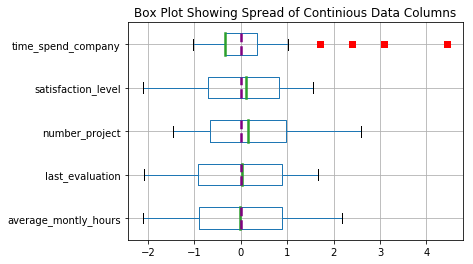


Frequencies of Categorical Data:


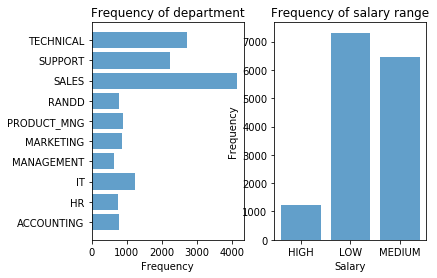

In [23]:
# 2. look at data and see what's going on - basic stats
print("\nBasic Stats (only first 6 elements):")
min = np.min(df.values[:,0:5], axis=0)
max = np.max(df.values[:,0:5], axis=0)
mean = np.mean(df.values[:,0:5], axis=0)
print(df.columns[0:5])
print("min:\t",min)
print("max:\t",max)
print("range:\t", (max-min))
print("mean:\t", mean)

# Stats on people who have left
percent_left = ((df[df["left"] == True].shape[0]) / df.shape[0]) * 100
print("percent of people who have left: ", percent_left)

# Box and whisker
exclude = ['work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
df_norm.loc[:, df.columns.difference(exclude)].boxplot(vert=False, sym='rs', showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanlineprops)
plt.title("Box Plot Showing Spread of Continious Data Columns")
plt.show()

print("\nFrequencies of Categorical Data:")
fig, ((a,b)) = plt.subplots(1,2)
unique_elements, counts_elements = np.unique(df.values[:,8], return_counts=True)
y_pos = np.arange(len(unique_elements))
a.barh(y_pos, counts_elements, align='center', alpha=.7)
a.set_yticks(y_pos, minor=False)
a.set_yticklabels(unique_elements, fontdict=None, minor=False)
a.set_xlabel('Frequency')
a.set_title("Frequency of department")

# print("\nFrequency of salary:")
unique_elements2, counts_elements2 = np.unique(df.values[:,9], return_counts=True)
y_pos = np.arange(len(unique_elements2))
b.bar(y_pos, counts_elements2, align='center', alpha=.7)
b.set_xticks(y_pos, minor=False)
b.set_xticklabels(unique_elements2, fontdict=None, minor=False)
b.set_xlabel('Salary')
b.set_ylabel('Frequency')
b.set_title("Frequency of salary range")
plt.show()

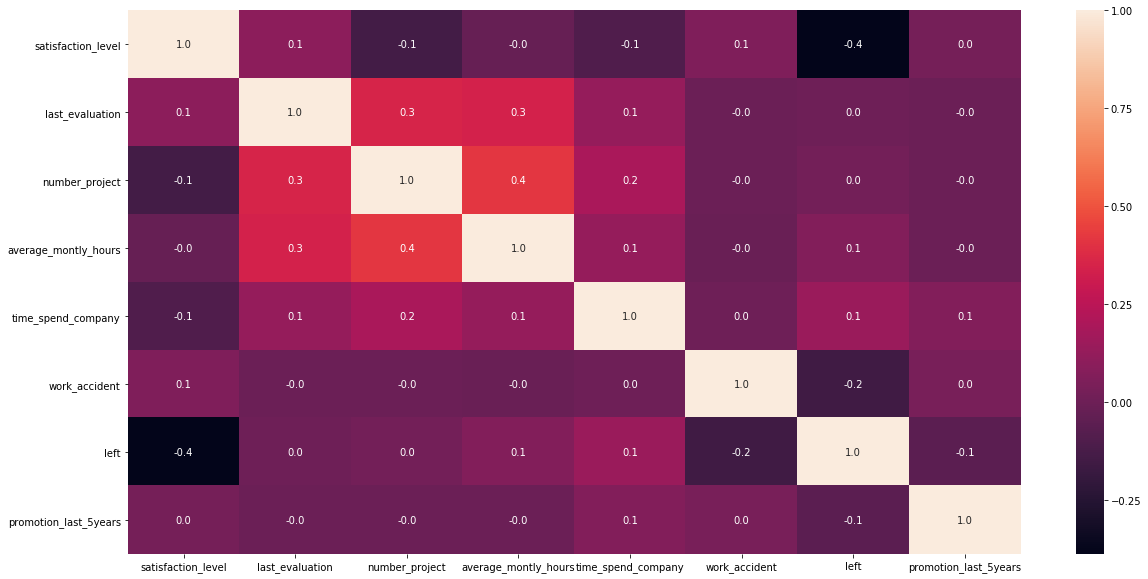

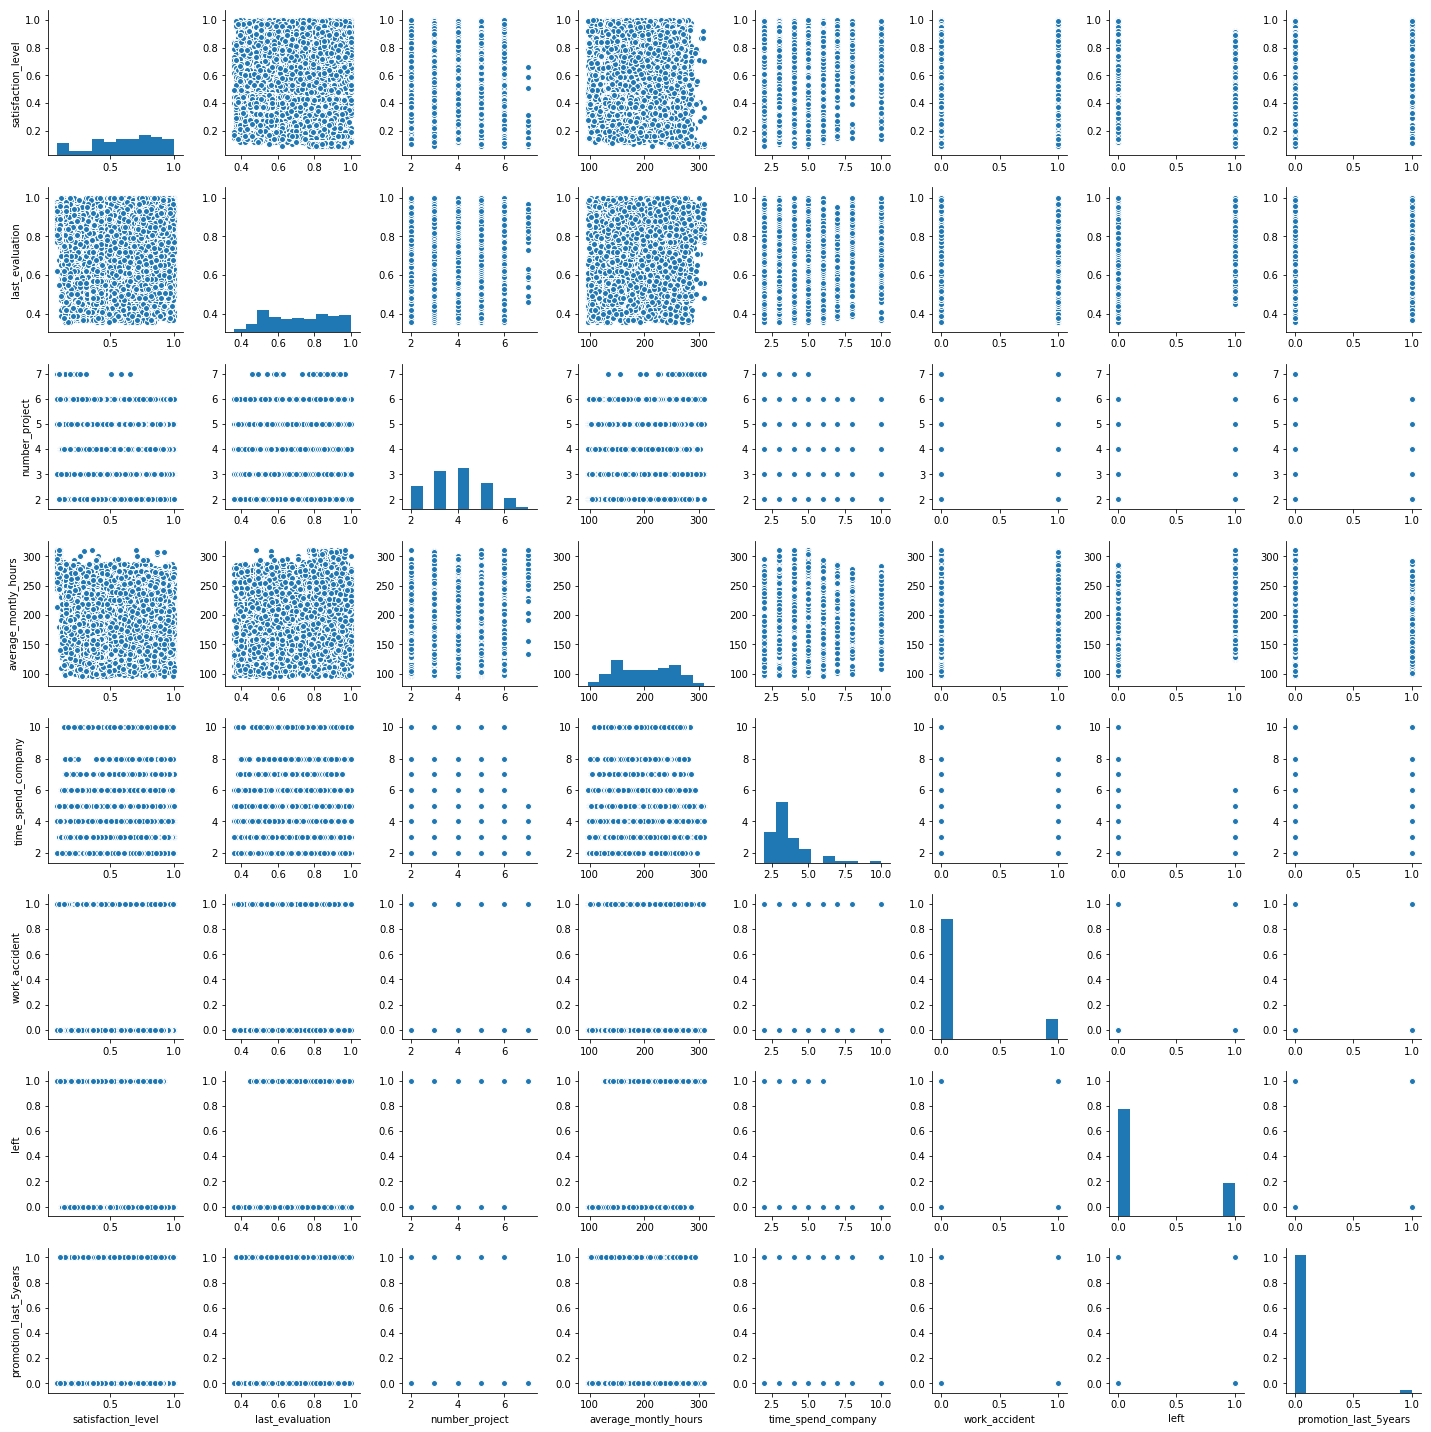

In [26]:
# 3. correlations
plt.rcParams["figure.figsize"] = (20,10)
corr = df_norm.corr()
sb.heatmap(corr, annot=True, fmt=".1f")
plt.show()

sb.pairplot(df)
plt.show()

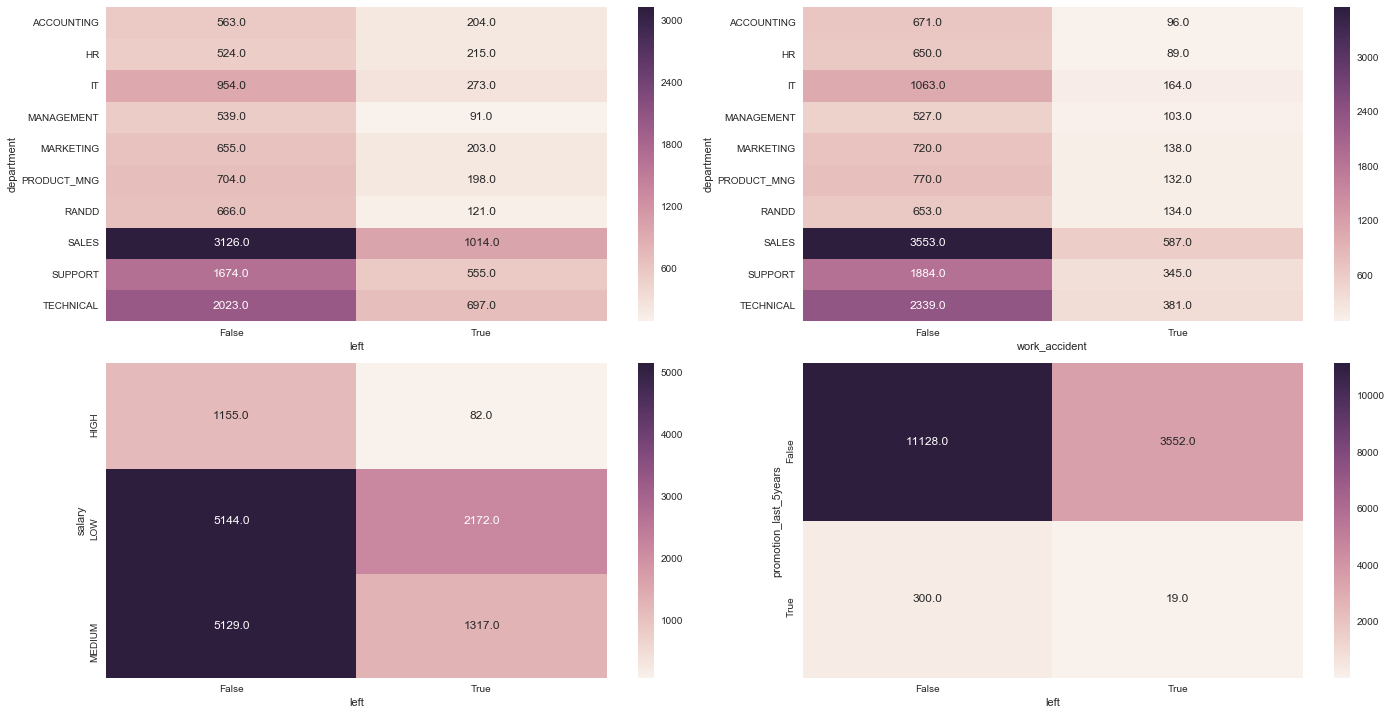

In [49]:
# 4. Continued Correlations Between Specific Fields
plt.rcParams["figure.figsize"] = (20,10)
fig, ((a,b), (c,d)) = plt.subplots(2,2)
sb.heatmap(pd.crosstab(df.department, df.left), annot=True, fmt=".1f", ax=a)
sb.heatmap(pd.crosstab(df.department, df.work_accident), annot=True, fmt=".1f", ax=b)
sb.heatmap(pd.crosstab(df.salary, df.left), annot=True, fmt=".1f", ax=c)
d.set_xlabel("Sales Department")
sb.heatmap(pd.crosstab(df.promotion_last_5years, df.left), annot=True, fmt=".1f", ax=d)
plt.tight_layout(pad=0.8, w_pad=0.5, h_pad=1.0)
plt.show()

# Summary of Findings -  Insight Into The Data 
## Basic Statistics (2)
The initial work on the data shows that there are 10 dimensions (fields) to each record (row) in the dataset. 2 of these fields are decimal numbers, 3 are integer numbers, 3 are boolean values and 2 are categorical types. This means that the data can be separated into many different classes based on specific fields. The business case presented from the source (https://www.kaggle.com/ludobenistant/hr-analytics-1) is concerned with why the best and most experienced employees are leaving the company. This is important to know which fields to focus on. We want to learn how the field "left" is affected by the rest of the data. 

Approximately 24% of total staff in the database have left the company.

From the basic statistics we can see that the ranges of the first 5 fields (number fields) is fairly large and on different scales. The data must therefore be normalised. The normalised box plot shows us that there are some outlier values in the dataset with respect to the time spent at the company - otherwise the time spent at the company seems evenly distributed but with the median tending to the first quartile. This means that there seems to be a tendency of employees to stay at the company less than the average amount of time. The satisfaction level is also skewed towards a lower satisfaction within the company. From the frequencies it appears that most employees have a low to medium salary.

## Correlations (3)
The initial heat map shows us that there is a negative correlation (i.e. the amount of people who have left the company increases whilst this metric decreases) between the satisfaction level of an employee and that employee subsequently leaving. This means that a core reason for leaving the company is employee satisfaction. Another negative correlation (which has half the effect of satisfaction) is work related accidents. These may cause employees to have to leave the company as a result. A final relationship between employees leaving the company and not getting a promotion in the last 5 years can be seen. Its effect is much less significant than the other two negative correlations. 

Some indirect effecters of satisfaction can also be noted. The number of projects and the time spent at the company seems to have a slightly negative effect on the satisfaction levels of employees. 

There are other blocks of positive correlations but these relate to logical connections between metrics in the database such as the average number of monthly hours and number of projects an employee has. 

## Continued Correlations Between Specific Fields (4)
In this section a further drill down of information can be inferred. Most the employees who have left the company come from the sales, technical and support departments (in decreasing order). Work accidents seem to also occur the most in these departments (In the same decreasing order). The leaving of employees also seems to be related to low and medium salaries as employees with high salaries leaving considerably less. A promotion in the last 5 years also seems to greatly reduce the chances of an employee leaving.

## Conclusion
It seems that the reasons employees have been leaving is caused by dissatisfaction with their jobs, work injuries and their current salaries. These problems seem to be most present in the sales, technical and support departments. A factor in reducing the chances of an employee leaving is if they have had a promotion within the last 5 years.
